# 문제제기

## 1. '도박' 키워드
- 2019~2022 현재까지 '도박' 키워드 중 '청소년'이 차지하는 비율 비교

In [71]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df, keyword

def News(keyword, ex_keyword, num, start_date, end_date):
    global news_df, url,page_num
    
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    ex_keyword = urllib.parse.quote(ex_keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+ '+-' + ex_keyword + '&photo=3'+'&pd=3'+ '&ds='+start_date+'&de='+end_date+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

#검색키워드, 제외키워드, num, start_date, end_date 
# News('도박','양현석', 1000,'2019.01.01','2019.12.31')
# News('도박',' ', 1000,'2020.01.01','2020.12.31')
News('도박','이재명', 1000,'2021.01.01','2021.12.31')
# News('도박','공무원', 500,'2022.01.01','2022.07.29')

,title,url
0,"""무료 모바일게임 연결해 도박장 열면 불법""",https://www.sedaily.com/NewsView/22VGW8QULD
1,도박업자·前야구선수·신천지까지… 고액체납자 7천명 세금 5조 안냈다,http://www.fnnews.com/news/202112161823463233
2,불법 스포츠도박 신고 포상금 이달 한해 500만원까지 준다,http://news.kmib.co.kr/article/view.asp?arcid=...
3,"하루 새 환율 30% 들썩…에르도안의 금리 인하, 독립인가 도박인가",https://www.hani.co.kr/arti/international/inte...
4,"개인 세금 체납액 1·2위, 불법 도박 사이트 운영자",http://news.kmib.co.kr/article/view.asp?arcid=...
...,...,...
995,‘국민 1인 1중독 시대’ 전문가 양성해 청소년 중독 예방해야,http://news.kmib.co.kr/article/view.asp?arcid=...
996,하와이·라스베이거스 주차 전쟁… 뉴욕 오면 무료 접종,https://www.chosun.com/international/us/2021/0...
997,[기자가만난세상] 벼락거지와 2030의 재테크,http://www.segye.com/content/html/2021/05/07/2...
998,코로나19 역설...주류·카지노株 부활,http://news.heraldcorp.com/view.php?ud=2021031...


In [72]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [74]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

#2019
# data19 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data19)

#2020
# data20 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data20)

2021
data21 =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data21)

# #2022
# data22 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data22)

df=pd.DataFrame(series, columns=['cnt'])
df.head()



,cnt
도박,151
게임,67
불법,41
칼럼,40
코인,40


## 2019

In [32]:
data19.pop('도박')
data19.pop('불법')

48

(-0.5, 1499.5, 999.5, -0.5)

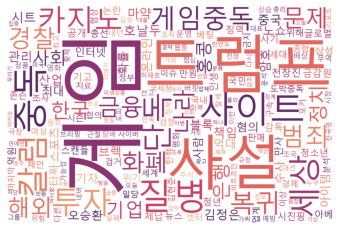

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data19)
plt.imshow(wordcloud)
plt.axis('off')

## 2020

In [45]:
data20.pop('도박')
data20.pop('불법')
data20.pop('만원')
data20.pop('단독')

(-0.5, 1499.5, 999.5, -0.5)

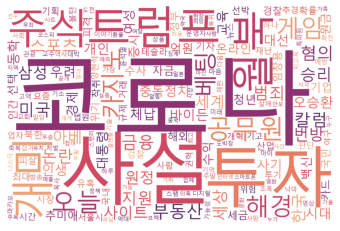

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data20)
plt.imshow(wordcloud)
plt.axis('off')

## 2021

In [75]:
data21.pop('도박')
data21.pop('불법')
# data21.pop('만원')

41

(-0.5, 1499.5, 999.5, -0.5)

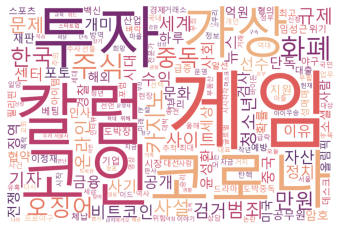

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data21)
plt.imshow(wordcloud)
plt.axis('off')

## 2022

In [65]:
url

'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%8F%84%EB%B0%95+-%20&photo=3&pd=3&ds=2022.01.01&de=2022.07.29&start=941'

In [69]:
data22.pop('도박')
data22.pop('불법')
# data21.pop('만원')

19

(-0.5, 1499.5, 999.5, -0.5)

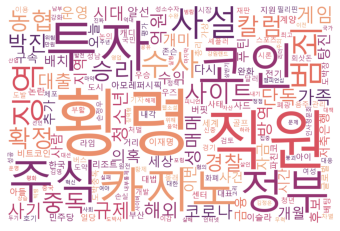

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data22)
plt.imshow(wordcloud)
plt.axis('off')

# 원인

## 1. '청소년 도박 원인' 키워드
- 청소년 도박에 영향을 미치는 요인들

In [91]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요 청소년 도박 원인
필요한 뉴스기사의 숫자를 입력해주세요 1000


,title,url
0,"청소년불법도박, 어떠한 경우에도 선처 불가능해",http://www.globalepic.co.kr/view.php?ud=202207...
1,'아이 어른 할 것 없이 베팅'…한탕주의 도박 늪에 빠진 충북,https://www.news1.kr/articles/?4742532
2,"소년범죄, 원인부터 살피고 대책 논의를",https://www.hani.co.kr/arti/opinion/because/10...
3,"""처벌보다는 예방…사회적 안전망 구축해야""[범람하는 불법도박(下)]",http://www.fnnews.com/news/202206301359007765
4,[공공돋보기] 학교폭력 도화선 '청소년 도박 중독',http://www.00news.co.kr/news/articleView.html?...
...,...,...
995,[충청브리핑] 바른정당 의원 14명 ‘洪 지지’ 탈당 결의,http://www.newdaily.co.kr/news/article.html?no...
996,"[취재] 아이와 부모의 게임 소통? ""함께 공감하고 대화해요""",http://www.inven.co.kr/webzine/news/?news=192577
997,"시중銀, 가상화폐거래소에 가상계좌 380만개 남발",http://decenter.sedaily.com/NewsView/1RUH6DWV01
998,아이와 스마트폰 신경전 끝내는 법,http://www.sisain.co.kr/?mod=news&act=articleV...


In [92]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [ ]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_words = ['도박', '예방', '불법', '문제', '청소년','원인','중독','교육','도박중독','범죄','센터','한국','질병','게임중독','장애','코드','규제','사회','산업','아이','업계','치료','몰입','도입','뉴스','논란','이유','학생','대책','문화','이용','관리','증상','이슈','성인','칼럼','기획']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_words:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])
df.to_list('list')
df

In [115]:
data20 = df20.to_dict('list')
data20

{'cnt': [320,
  35,
  26,
  24,
  22,
  22,
  21,
  19,
  18,
  18,
  16,
  16,
  16,
  15,
  14,
  14,
  14,
  13,
  13,
  13]}

- wordcloud

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data20)
plt.imshow(wordcloud)
plt.axis('off')

TypeError: float() argument must be a string or a number, not 'dict'

## 2019

In [88]:
data22.pop('도박')
data22.pop('청소년')
data22.pop('센터')
data22.pop('예방')
data22.pop('문제')

110

In [90]:
url

'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%B2%AD%EC%86%8C%EB%85%84%20%EB%8F%84%EB%B0%95+-&photo=0&pd=3&ds=2022.01.01&de=2022.07.29&start=491'

In [ ]:
data22

{'불법': 108,
 '스포츠': 85,
 '관리': 71,
 '한국': 50,
 '상담': 48,
 '교육': 47,
 '이용': 37,
 '중독': 37,
 '사이트': 33,
 '학교': 33,
 '도박중독': 32,
 '복지': 30,
 '스포츠토토': 29,
 '경찰': 28,
 '온라인': 26,
 '위기': 25,
 '실시': 24,
 '캠페인': 23,
 '제보': 21,
 '발견': 20,
 '서산시': 19,
 '모집': 19,
 '신고': 19,
 '보호': 18,
 '협약': 18,
 '학생': 16,
 '절대': 15,
 '서울시': 15,
 '서울': 15,
 '합법': 15,
 '모든': 14,
 '범죄': 14,
 '지원': 13,
 '처벌': 12,
 '사이버': 12,
 '업무': 12,
 '즉시': 12,
 '선도': 11,
 '극단': 11,
 '대상': 11,
 '코로나': 11,
 '인터넷': 11,
 '가정': 11,
 '대전': 11,
 '후배': 11,
 '위험': 10,
 '교육청': 10,
 '지역': 10,
 '대책': 10,
 '학교폭력': 10,
 '조사': 10,
 '스마트폰': 10,
 '충남': 10,
 '이용도': 10,
 '전문': 10,
 '행복': 10,
 '선택': 9,
 '노출': 9,
 '개최': 9,
 '안전': 9,
 '게임': 9,
 '활동': 9,
 '평택': 9,
 '시간': 9,
 '근절': 8,
 '연수': 8,
 '생활': 8,
 '운영': 8,
 '위원회': 8,
 '프로그램': 8,
 '선정': 8,
 '충주시': 8,
 '지도자': 8,
 '경찰서': 8,
 '청년': 8,
 '여름방학': 7,
 '유해': 7,
 '추진': 7,
 '행위': 7,
 '토토': 7,
 '체결': 7,
 '상주': 7,
 '차단': 7,
 '뉴욕주': 7,
 '세수': 7,
 '논란': 7,
 '가족': 6,
 '집중': 6,
 '대비': 6,
 '종합': 6,
 '자치': 6,
 '시작

(-0.5, 1499.5, 999.5, -0.5)

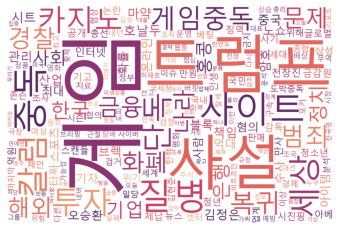

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data19)
plt.imshow(wordcloud)
plt.axis('off')